In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow

0        False
1        False
2        False
3        False
4        False
         ...  
30473    False
30474    False
30475    False
30476    False
30477    False
Name: Price, Length: 30478, dtype: bool


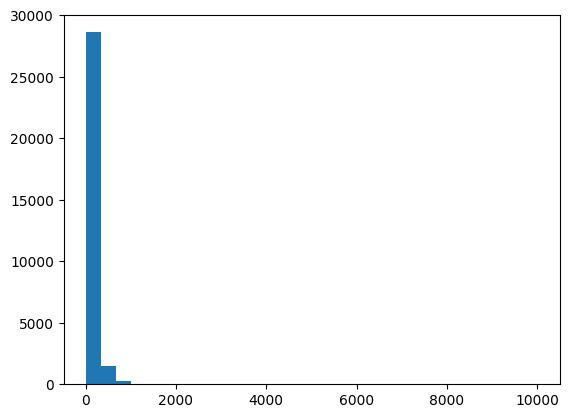

In [39]:
df = pd.read_csv("airbnb_hw.csv")
df = df.replace(',','',regex=True)
df['Price']=df['Price'].astype(int)
plt.hist(df['Price'], bins=30)
print(np.isnan(df["Price"]))
#First I replaced all commas with whitespace, I did this so that the price could
#properly be formulated as an int (commas force it into a string)
# then typecast each value in price into an int, finally I checked for nan, everything looked fine 
#so I left it there.

In [40]:
df = pd.read_csv("mn_police_use_of_force.csv")
df = df.replace("","Unknown",regex=True)
count = df['subject_injury'].count()
df['subject_injury'].fillna('Unknown', inplace=True)
print(df.loc[:,"subject_injury"])
unknown = df['subject_injury'].str.count('Unknown').sum()
print(unknown/df.shape[0])
crosstab = pd.crosstab(df['subject_injury'], df['force_type'])
print(crosstab)

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
12920    Unknown
12921    Unknown
12922    Unknown
12923    Unknown
12924    Unknown
Name: subject_injury, Length: 12925, dtype: object
0.7619342359767892
force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
No                  0          1093                131        2   
Unknown             2          7051               1421        0   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
No                             33                 34            0   
Unknown                        27                 74           87   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Tec

/var/folders/d7/g8wkwqjn04b5wd6db1c0_t740000gn/T/ipykernel_75755/3771703498.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['subject_injury'].fillna('Unknown', inplace=True)


About 76% of data points are missing, obviously this is very concerning. Instances of bodily force are what have the highest proportion of missing values, other instances with high proportions include chemical irritants (im assuming thats pepper spray), and less lethal. I'm assuming what this means is that in events where its less obviously lethal but potentially dangerous its more likely for the officer to turn off their body cam.

In [41]:
df = pd.read_parquet('justice_data.parquet')
df.to_csv('justice_data.csv')
arr = np.nan_to_num(df['WhetherDefendantWasReleasedPretrial'], 0)
arr
df['WhetherDefendantWasReleasedPretrial'].replace(9,0, inplace = True)
print(df['WhetherDefendantWasReleasedPretrial'].head(50))


0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     0
9     1
10    1
11    0
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    0
22    1
23    1
24    1
25    0
26    0
27    0
28    0
29    1
30    0
31    0
32    0
33    1
34    0
35    1
36    1
37    1
38    0
39    1
40    0
41    0
42    1
43    1
44    1
45    1
46    0
47    1
48    1
49    0
Name: WhetherDefendantWasReleasedPretrial, dtype: int64


/var/folders/d7/g8wkwqjn04b5wd6db1c0_t740000gn/T/ipykernel_75755/1719284571.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WhetherDefendantWasReleasedPretrial'].replace(9,0, inplace = True)


In [42]:
df = pd.read_parquet('justice_data.parquet')
df.to_csv('justice_data.csv')
arr = np.nan_to_num(df['ImposedSentenceAllChargeInContactEvent'], 0)
arr2 = np.nan_to_num(df['SentenceTypeAllChargesAtConvictionInContactEvent'], 0)
df['ImposedSentenceAllChargeInContactEvent'] = arr
df['SentenceTypeAllChargesAtConvictionInContactEvent'] = arr2
print(df['ImposedSentenceAllChargeInContactEvent'].head(20))
print(df['SentenceTypeAllChargesAtConvictionInContactEvent'].head(20))
df_sorted = df.sort_values(by ='SentenceTypeAllChargesAtConvictionInContactEvent')

0                     
1                   60
2                   12
3     .985626283367556
4                     
5                   12
6                   36
7                    6
8                   24
9                   12
10    5.91375770020534
11                    
12                    
13                 120
14                  24
15                    
16                    
17                  12
18                    
19                  12
Name: ImposedSentenceAllChargeInContactEvent, dtype: object
0     9
1     0
2     1
3     1
4     4
5     0
6     1
7     0
8     1
9     1
10    0
11    4
12    4
13    1
14    1
15    4
16    4
17    0
18    4
19    0
Name: SentenceTypeAllChargesAtConvictionInContactEvent, dtype: int64


The instructions were a little unclear so I just replaced all of the NaN values with 0s in both columns. I then sorted the ImposedSentence variable by the SentenceType. I didn't understand how the variables were connected, so I just sorted because the instructions said there was a connection.

In [43]:
df = pd.read_excel("GSAF5.xls")
df.dropna(axis=1, how="all", inplace=True)
#remove all rows with empty data
df = df[df['Year']>=1940]
df['Age']=df['Age'].astype(int)
df['Age'].hist()


ValueError: invalid literal for int() with base 10: '60+'

In [37]:
df['Sex'].value_counts()
df['Sex'].str.strip()
df = df[df['Sex'].isin(["M","F"])]
print(df["Sex"].value_counts())
df['Fatal Y/N'].replace("","Unknown",regex=True)
dead_men_coefficient = np.corrcoef(df['Fatal Y/N'], df['Type'])
dead_women_coefficient = np.corrcoef(df['Fatal Y/N'],df['Sex'])
df['Species'].str.split()


Sex
M    4295
F     706
Name: count, dtype: int64


TypeError: can only concatenate str (not "float") to str

Shark attacks have slightly increased over time. 85.88% of shark attack victims are male. Shark attacks are far more likely to kill men over women, the attack is more likely to bef atal when provoked. Great white sharks are the most common species that attack people. I personally like sharks. I don't want to be up close to one or anything like that but like any other animal I think we have a need to protect them especially since many species of sharks are endangered. Like any other animal you just have to make deliberate choices to decrease your probability of getting attacked. Part of the issue also has to do with sensationalism, bear attacks are far more common but we don't see Bear Week on national television. Same thing with plane crashes, they're far less frequent than car crashes but receive far more attention than the annual 45,000 traffic deaths in the US.